# Домашнее задание 1

In [2]:
import os
import re
from pymystem3 import Mystem
import string
import nltk
import numpy as np
import pandas as pd
from datetime import datetime
import pickle as pkl

## Коллекция

In [76]:
mystem = Mystem()

In [77]:
string.punctuation = string.punctuation.replace('-','')

In [85]:
def preprocessing(text):
    text = re.sub('(Автор|Регион):.*?\n','', text)
    text = re.sub('[0-9\n]','', text)
    text = re.sub('['+string.punctuation+']', '', text)
    text = ''.join(mystem.lemmatize(text.strip()))
    return text

In [86]:
data = pd.DataFrame(columns=['file', 'text'])

In [87]:
path = '.\\data\\'

In [88]:
start = datetime.now()
for root, dirs, files in os.walk (path):
    for fl in files:
        #print (fl)
        with open(path+fl, 'r', encoding = 'utf-8') as f:
            text = f.read()
        data = data.append({'file': fl, 'text': preprocessing(text)}, ignore_index=True)
print ('Total time: {}'.format(datetime.now()-start))

Total time: 0:31:43.948500


In [102]:
data.head()

,file,text
0,100_10.txt,известие московский выпуск трансляция суде...
1,100_2.txt,российский газета депутат продолжать...
2,100_9.txt,известие илья пономарев грозить арест имущ...
3,101_1.txt,известие москва дмитрий медведев менять си...
4,101_10.txt,коммерсант начинать первый уголовный пресле...


In [99]:
with open('data.pkl', 'wb') as f:
    pkl.dump(data, f)

In [3]:
with open('data.pkl', 'rb') as f:
    data = pkl.load(f)

In [96]:
def tabs(x):
    return re.sub('\t','', x)

In [97]:
data['text'] = data['text'].apply(tabs)

In [4]:
def load_frequency():
    freq_dict = {}
    with open ('.//freqrnc2011.csv','r', encoding='utf-8') as f:
        w = f.readlines()
    for i in w:
        s = i.strip().split('\t')
        if s[0] not in freq_dict:
            freq_dict[s[0].lower()] = float(s[1])
    return freq_dict
freq_dict = load_frequency()

In [5]:
print (freq_dict['я'])

12684.4


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True,
                                   stop_words=nltk.corpus.stopwords.words('russian'),
                                   analyzer ='word'
                                  )

In [8]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

In [9]:
with open('tfidf_matrix.pkl', 'wb') as f:
    pkl.dump(tfidf_matrix, f)

In [10]:
tfidf_matrix.shape

(1228, 38314)

In [11]:
tfidf_vectorizer.idf_

array([6.72766175, 7.01534382, 7.42080893, ..., 4.85585957, 7.42080893,
       6.72766175])

In [12]:
tfidf_vectorizer.idf_.shape

(38314,)

## 1.2 (Instr) TF_IDF матрица для первых 5 документов

In [13]:
matrix_5 = tfidf_vectorizer.transform(data['text'][0:5], copy=True)

In [14]:
data_5 = pd.DataFrame(matrix_5.todense())

In [15]:
data_5.to_csv('1.csv', sep='\t')

In [16]:
data_5.columns

RangeIndex(start=0, stop=38314, step=1)

In [17]:
data_5.columns = tfidf_vectorizer.get_feature_names()

In [18]:
data_5.loc[:, (data_5 != 0).any(axis=0)]

,ddos,inbister,nirvana,spice,spravsibru,sro,ава,август,австралия,австрия,...,юридический,юрий,юрисдикция,юстиция,являться,якобы,яковлев,яна,январь,япония
0,0.059466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019412,0.000000,0.000000,...,0.018047,0.000000,0.000000,0.000000,0.012010,0.000000,0.028119,0.02928,0.00000,0.000000
1,0.000000,0.052041,0.000000,0.000000,0.000000,0.052041,0.049198,0.026172,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.032383,0.000000,0.000000,0.00000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.045028,0.000000,0.000000,0.023953,0.000000,0.000000,...,0.000000,0.065728,0.000000,0.000000,0.029638,0.022087,0.000000,0.00000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.083856,0.037953,0.000000,0.000000,0.000000,0.00000,0.02453,0.000000
4,0.000000,0.000000,0.127669,0.127669,0.000000,0.000000,0.000000,0.000000,0.030631,0.033327,...,0.000000,0.000000,0.000000,0.000000,0.026481,0.000000,0.000000,0.00000,0.00000,0.026309


In [19]:
data_5.loc[:, (data_5 != 0).any(axis=0)].to_csv('5docTFIDF.csv', sep='\t')

## 1.1 По одному тексту

Пусть будет первый текст из коллекции.

Посмотрим, что там:

In [27]:
with open ('.\\data\\100_10.txt','r', encoding = 'utf-8') as f:
    text = f.read()
    print (re.sub('[\n]+', '\n', text))

 Известия 
 Автор: Герман Петелин 
   Генпрокуратура обжалует смягчение приговора педофилу Куваеву
"В понедельник Генпрокуратура внесет протест в Верховный суд на приговор педофилу Куваеву, который был смягчен", -заявил "Известиям" источник в надзорном ведомстве. После протеста суд может пересмотреть приговор скандально известному 40-летнему педофилу и "интернет-спамеру № 2 в мире" Леониду Куваеву. В марте этого года он получил 20 лет лишения свободы за изнасилование несовершеннолетних воспитанниц детдомов. После чего Верховный суд "снял" с него 20 эпизодов из 35 и снизил ему срок вдвое. Генпрокуратура сочла это решение слишком мягким. 
Судебный процесс над Леонидом Куваевым стал самым громким за последние годы. Его считали вторым по известности интернет-спамером в мире. За миллионером и организатором многих DDoS-атак безуспешно охотились американские спецслужбы, однако он попался в России на совращении и изнасиловании детей. 
Суд установил, что Куваев знакомился с детьми, представляяс

In [28]:
text = data['text'][0]

Посчитать леммы

In [29]:
from collections import Counter

In [30]:
all_words = Counter(text.split())

Выделить ключевые слова по TF-IDF матрице

In [24]:
matrix_1 = tfidf_vectorizer.transform([data['text'][0]], copy=True)
data_1 = pd.DataFrame(matrix_1.todense())
data_1.columns = tfidf_vectorizer.get_feature_names()

In [25]:
data_1.loc[:, (data_1 > 0.06).any(axis=0)]

,аудио,верховный,видеозапись,воспитанница,генпрокуратура,год,головко,девочка,депутат,закон,...,следователь,снисхождение,спамер,стенографирование,суд,судебный,судья,трансляция,требовать,эпизод
0,0.09233,0.066208,0.07303,0.06999,0.07303,0.092568,0.06999,0.156834,0.061243,0.086213,...,0.064661,0.06999,0.090686,0.06999,0.236621,0.108586,0.062468,0.093692,0.061125,0.099491


In [31]:
data_1['закон'][0]

0.08621309501763894

In [32]:
words = data_1.loc[:, (data_1 > 0.06).any(axis=0)].columns
words

Index(['аудио', 'верховный', 'видеозапись', 'воспитанница', 'генпрокуратура',
       'год', 'головко', 'девочка', 'депутат', 'закон', 'законопроект',
       'заседание', 'игошин', 'известие', 'изнасилование', 'куваев', 'куваева',
       'леонид', 'малолетний', 'мвд', 'несовершеннолетний', 'оргия', 'педофил',
       'половой', 'приводить', 'приговор', 'проституция', 'ребенок', 'россия',
       'следователь', 'снисхождение', 'спамер', 'стенографирование', 'суд',
       'судебный', 'судья', 'трансляция', 'требовать', 'эпизод'],
      dtype='object')

Получим частоту по частотному словарю:

In [33]:
def freq(word):
    if word in freq_dict:
        return freq_dict[word]
    else:
        return 0

freqs = [freq(word) for word in words]

Запомним TF-IDF значения

In [34]:
tf_idfs = [data_1.iloc(0)[0][data_1.iloc(0)[0]>0][word] for word in words]

Длину текста в словах

In [35]:
total_text = len(text.split())
total_text

1240

Абсолютная частота

In [36]:
tf = [all_words[word]/total_text*1000000 for word in words]

Всего слов в коллекции (токенов)

In [37]:
total = len(" ".join(data["text"]).split())
total

764915

Абсолютная частота во всей коллекции

In [38]:
df_all = Counter(" ".join(data["text"]).split())

Количество уникальных лемм

In [39]:
len(df_all)

45613

Частота в коллекции для ключевых слов

In [40]:
collection = [df_all[word]/total*1000000 for word in words]

Сделаем таблицу для ключевых слов

In [41]:
key_words = pd.DataFrame({'word':words, 
                          'ipm_freq':freqs, 
                          'tfidf':tf_idfs, 
                          'ipm_tf':tf, 
                          'ipm_collection':collection,
                          'abs_tf':np.array(tf)/1000000})
key_words = key_words.sort_values(by=['tfidf'], ascending=False)
key_words.to_csv('HW1_Glazunov_KeyWords.txt', index=False, sep='\t')

In [42]:
key_words

,abs_tf,ipm_collection,ipm_freq,ipm_tf,tfidf,word
15,0.012903,70.596079,0.0,12903.225806,0.513342,куваев
22,0.007258,70.596079,1.0,7258.064516,0.247216,педофил
33,0.013710,943.895727,371.1,13709.677419,0.236621,суд
16,0.004839,19.610022,0.0,4838.709677,0.209969,куваева
7,0.005645,141.192159,185.1,5645.161290,0.156834,девочка
34,0.004839,271.925639,126.1,4838.709677,0.108586,судебный
11,0.004839,270.618304,96.7,4838.709677,0.104079,заседание
38,0.003226,48.371388,43.5,3225.806452,0.099491,эпизод
27,0.005645,913.827027,658.3,5645.161290,0.094396,ребенок
36,0.003226,70.596079,7.5,3225.806452,0.093692,трансляция


## 1.2

Это уже частичто сделано выше (не очень понятно, как соответствуют задание в инструкции и файле)


TF-IDF таблица для 5 файлов

In [44]:
data_5

,abba,abbyy,abgeschlossen,abhaziahtml,able,abraham,abrt,absolut,access,account,...,ячейка,ячменев,яшин,яшинпочий,ященко,ященкова,ящерицын,ящик,яэль,яя
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Выберем слова для отображения (6 ключевых и 3 частотных по словарю)

In [102]:
words_1_2 = ['куваев','педофил','суд','девочка','заседание','эпизод',
             'жизнь','знать','очень']

In [103]:
data_5[words_1_2]

,куваев,педофил,суд,девочка,заседание,эпизод,жизнь,знать,очень
0,0.513342,0.247216,0.236621,0.156834,0.104079,0.099491,0.011446,0.012333,0.031077
1,0.000000,0.000000,0.018766,0.000000,0.023387,0.000000,0.000000,0.000000,0.000000
2,0.039590,0.033894,0.068700,0.000000,0.000000,0.000000,0.000000,0.015218,0.000000
3,0.000000,0.000000,0.283062,0.000000,0.050395,0.000000,0.000000,0.000000,0.045142
4,0.000000,0.000000,0.000000,0.000000,0.019124,0.000000,0.037857,0.000000,0.000000


In [53]:
all_texts = pd.DataFrame(tfidf_matrix.todense())
all_texts.columns = tfidf_vectorizer.get_feature_names()

Word1 & Word2 & not Word3

In [65]:
data[(all_texts['россия']>0) & (all_texts['путин']>0) & (all_texts['президент']==0)]['file']

17       107_6.txt
57      123_10.txt
80       132_2.txt
110      145_5.txt
149      162_5.txt
190     180_10.txt
202       18_2.txt
219       19_8.txt
255      21_10.txt
484      339_4.txt
575       37_2.txt
616     392_12.txt
624      394_4.txt
649      401_6.txt
666      409_9.txt
690      418_4.txt
779     455_12.txt
806      464_8.txt
966      532_2.txt
1004     545_8.txt
1088    555_11.txt
1186     83_13.txt
Name: file, dtype: object

In [83]:
a = set(tfidf_vectorizer.get_stop_words())

In [84]:
b = set(nltk.corpus.stopwords.words('russian'))

In [89]:
a - b

set()

Стопслова (которые везде) совпадают с теми, которые задали изначально

## 1.3

### Редкие слова в коллекции

In [91]:
rare_words = [key for key, value in sorted(df_all.items(), key = lambda x: x[1]) if value<4 and key in all_words]

In [92]:
rare_words = [word for word in rare_words if all_words[word] < 2]
rare_words

['оппозицииизвестие',
 'куваевув',
 'развратник',
 'сводница',
 'худенький',
 'жуков',
 'невменяемость',
 'педофильский',
 'сношение',
 'гособвинение',
 'общедоступнымипроект',
 'государственный-правовой',
 'поддавливать',
 'неразборчиво',
 'натравлять',
 '-заявлять',
 'втираться',
 'водить',
 'утеха',
 'пособничество',
 'сауна',
 'джакузи',
 'барный',
 'приглушенный',
 'прения',
 'массачусетс']

In [104]:
lex_10 = ['педофил','суд','девочка','заседание','эпизод','закон',
          'жизнь','знать',
          'сауна','утеха']

In [105]:
freqs = [freq(word) for word in lex_10]
tf_idfs = [data_1.iloc(0)[0][data_1.iloc(0)[0]>0][word] for word in lex_10]
tf = [all_words[word]/total_text*1000000 for word in lex_10]
collection = [df_all[word]/total*1000000 for word in lex_10]

In [106]:
key_words = pd.DataFrame({'word':lex_10, 
                          'ipm_freq':freqs, 
                          'tfidf':tf_idfs, 
                          'ipm_tf':tf, 
                          'ipm_collection':collection,
                          'abs_tf':np.array(tf)/1000000})
key_words = key_words.sort_values(by=['tfidf'], ascending=False)
key_words.to_csv('HW1_Glazunov_WordListTest.txt', index=False, sep='\t')

In [107]:
key_words

,abs_tf,ipm_collection,ipm_freq,ipm_tf,tfidf,word
0,0.007258,70.596079,1.0,7258.064516,0.247216,педофил
1,0.013710,943.895727,371.1,13709.677419,0.236621,суд
2,0.005645,141.192159,185.1,5645.161290,0.156834,девочка
3,0.004839,270.618304,96.7,4838.709677,0.104079,заседание
4,0.003226,48.371388,43.5,3225.806452,0.099491,эпизод
5,0.005645,937.359053,433.4,5645.161290,0.086213,закон
8,0.000806,3.922004,6.6,806.451613,0.034995,сауна
9,0.000806,3.922004,2.4,806.451613,0.034995,утеха
7,0.000806,580.456652,1713.8,806.451613,0.012333,знать
6,0.000806,802.703568,1389.8,806.451613,0.011446,жизнь


Это автоматически. Там в знаменателе натуаральный логарифм, а в задании десятичный. Но на результат (ранг значений) это не влияет, так как преобразование получается умножением на константу (перевод в логарифм с другим основанием), поэтому их можно считать эквивалентыми с точки зрения задачи.

** Соответствуют ли те слова, которые попали вверх списка, упорядоченного по убыванию tf.idf, Вашей интуиции? **

Да, ключевые слова попали в топ (они с высоким tf-idf), редкие слова, которые встретились в тексте, имеют небольшое значение показателя, так как их мало в тексте. Общеупотребительно частые слова имеют еще меньший показатель, так как знаменатель (количество документов) велико в силу частотности и общеупотребительности, что снижает показатель tf-idf.

** Все ли ключевые слова попали в верхнюю часть списка (в первые шесть слов), ранжированного по tf.idf? **

Да, так как они более тематические и более редкие (большой числитель, мальнький знаменатель)

** Какие слова попали вниз ранжированного списка? Каковы их характеристики с точки зрения грамматических характеристик, семантики; **

Общеупотребительные слова (в данном случае глагол и существительное).
Если бы не было стопслов, то тут были бы частицы, предлоги и местоимения.

** Как, по-вашему, должен быть устроен список «стоп»-слов, данные о которых нет смысла включать в таблицу? **

Так же, как и встроенный (местоимения, служебные части речи). Однако стоит считать tf-idf и на основе коллекции получать стопслова (методом, встроенным в векторайзер), которые вычисляются на основе матрицы.

### Усложненный вариант

In [122]:
words = data_1.loc[:, (data_1 > 0).any(axis=0)].columns

In [109]:
words

Index(['ddos', 'август', 'автомобиль', 'автор', 'адвокат', 'администрация',
       'америка', 'американский', 'арестовывать', 'атака',
       ...
       'чтение', 'шутить', 'эксперт', 'эпизод', 'эротический', 'это',
       'юридический', 'являться', 'яковлев', 'яна'],
      dtype='object', length=523)

In [123]:
tf_idfs = data_1[words].iloc[0].values

In [127]:
key_words = pd.DataFrame({'word':words,  
                          'tfidf':tf_idfs})
key_words = key_words.sort_values(by=['tfidf'], ascending=False)
#key_words.to_csv('HW1_Glazunov_WordListTest.txt', index=False, sep='\t')
first = key_words[:20]
last = key_words[-20:]

In [129]:
first

,tfidf,word
181,0.513342,куваев
280,0.247216,педофил
457,0.236621,суд
182,0.209969,куваева
84,0.156834,девочка
458,0.108586,судебный
129,0.104079,заседание
516,0.099491,эпизод
383,0.094396,ребенок
473,0.093692,трансляция


In [130]:
last

,tfidf,word
189,0.011603,лишь
504,0.011603,хотя
318,0.011574,появляться
62,0.011460,глава
116,0.011446,жизнь
217,0.011404,называть
434,0.011226,сообщать
226,0.011093,начинать
333,0.011014,президент
173,0.010824,компания


## 1.4 Разделение коллекции

In [136]:
new_texts = [" ".join(data["text"][i*122 : i*122 + 122]) for i in range(0,10)]

In [141]:
lengths = [len(text.split(' ')) for text in new_texts]

In [142]:
lengths

[79915, 81573, 78708, 79065, 79629, 78534, 81696, 79559, 79615, 79101]

In [144]:
df = pd.DataFrame({'subc. len':lengths})

In [145]:
df

,subc. len
0,79915
1,81573
2,78708
3,79065
4,79629
5,78534
6,81696
7,79559
8,79615
9,79101


In [148]:
for w in sorted(df_all, key=df_all.get, reverse=True)[:50]:
    if w not in nltk.corpus.stopwords.words('russian'):
        print (w)

-
который
это
год
свой
весь
россия
мочь
человек
новый
российский
становиться
интернет


Из текста выберем два с самым большим tf-idf, исключая фамилию, так как явно его не будет в остальных текстах.
Выбираем 'педофил' и 'суд'

In [175]:
df_words = ['который','год', 'педофил','суд']

In [176]:
for w in df_words:
    q = [Counter(text.split())[w]/df['subc. len'][key] for key, text in enumerate(new_texts)]
    df[w] = q

In [177]:
df

,subc. len,который,год,педофил,суд,девочка
0,79915,0.005706,0.005206,0.000138,0.001151,0.000213
1,81573,0.005038,0.005051,0.000025,0.000454,0.000074
2,78708,0.004955,0.005336,0.000025,0.000419,0.000191
3,79065,0.004933,0.005413,0.000000,0.000316,0.000177
4,79629,0.005249,0.004458,0.000013,0.001369,0.000251
5,78534,0.005628,0.004673,0.000280,0.000802,0.000064
6,81696,0.005802,0.005961,0.000000,0.001163,0.000147
7,79559,0.005518,0.004889,0.000025,0.001068,0.000038
8,79615,0.005640,0.004434,0.000038,0.001005,0.000013
9,79101,0.005841,0.004804,0.000139,0.001239,0.000190


In [178]:
import matplotlib.pyplot as plt

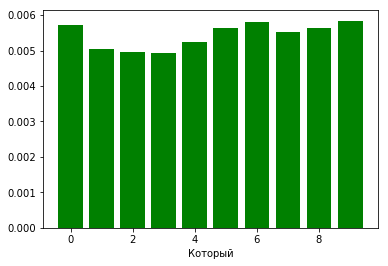

In [179]:
x = np.arange(10)
plt.bar(x, df['который'], color = 'green' )
plt.xlabel('Который')
plt.show()

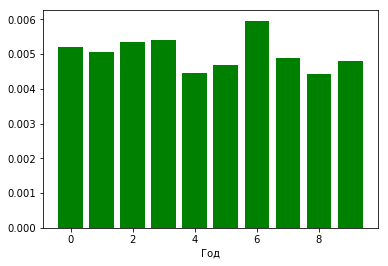

In [180]:
x = np.arange(10)
plt.bar(x, df['год'], color = 'green' )
plt.xlabel('Год')
plt.show()

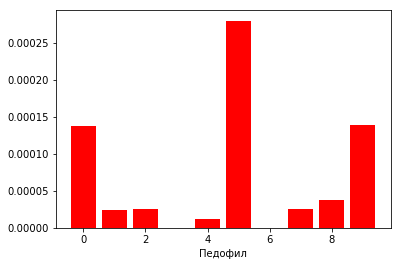

In [181]:
x = np.arange(10)
plt.bar(x, df['педофил'], color = 'red' )
plt.xlabel('Педофил')
plt.show()

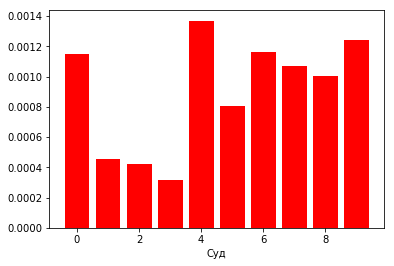

In [182]:
x = np.arange(10)
plt.bar(x, df['суд'], color = 'red' )
plt.xlabel('Суд')
plt.show()

Диаграммы с большим относительным разбросом. Если бы было деление тематическое (как при кластеризации), то было бы более показательно. И хотя деление рандомное (немотивированное), слова с высоким tf-idf (различающие тексты по теме), употребляются менее равномерно. Что логично совпадает с их специальностью. Их показатель частоты на порядок ниже общеупотребительных частотных, так как они более редкие (что тоже соответствует тому, что они специальные).